In [10]:
import numpy as np
from qiskit_aer import AerSimulator
#from qiskit_ibm_provider import IMBProvider
#from qiskit.provider.imbq import least_busy
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

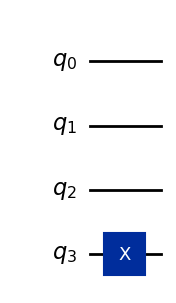

In [2]:
n=3
constant_oracle=QuantumCircuit(n+1)
output=np.random.randint(2)
if output==1:
    constant_oracle.x(n)
constant_oracle.draw('mpl')

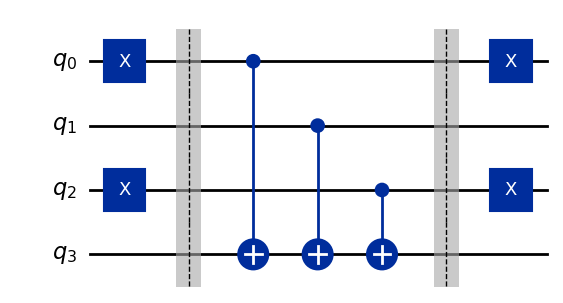

In [3]:
balanced_oracle=QuantumCircuit(n+1)
b_str="101"
for qubit in range(len(b_str)):
    if b_str[qubit]=='1':
        balanced_oracle.x(qubit)

balanced_oracle.barrier()
for qubit in range(n):
    balanced_oracle.cx(qubit,n)

balanced_oracle.barrier()
for qubit in range(len(b_str)):
    if b_str[qubit]=='1':
        balanced_oracle.x(qubit)

balanced_oracle.draw('mpl')

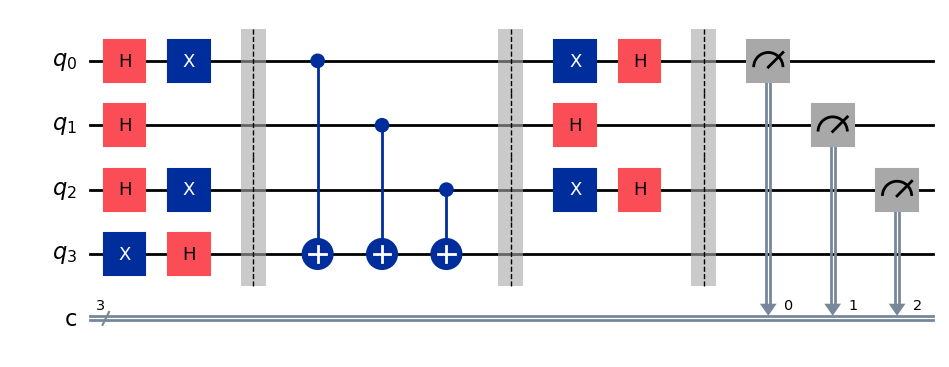

In [4]:
dj_circuit=QuantumCircuit(n+1, n)
for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit=dj_circuit.compose(balanced_oracle)

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw('mpl')

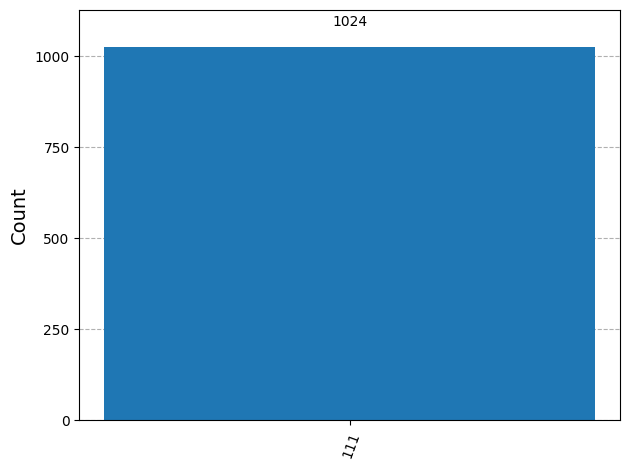

In [5]:
aer_sim=AerSimulator()
result=aer_sim.run(dj_circuit).result()
count=result.get_counts()
plot_histogram(count)

In [6]:
def dj_oracle(case, n):
    oracle_qc=QuantumCircuit(n+1)

    if case=='balanced':
        b=np.random.randint(1,2**n)
        b_str=format(b, '0'+str(n)+'b')
        
        for qubit in range(len(b_str)):
            if b_str[qubit]=='1':
                oracle_qc.x(qubit)

        for qubit in range(n):
            oracle_qc.cx(qubit, n)

        for qubit in range(len(b_str)):
            if b_str[qubit]=='1':
               oracle_qc.x(qubit)

    if case=='constant':
        output=np.random.randint(2)
        if output==1:
            oracle_qc.x(n)

    oracle_gate=oracle_qc.to_gate()
    oracle_gate.name="Oracle"
    return oracle_gate

In [7]:
def dj_algorithm(oracle, n):
    dj_circuit=QuantumCircuit(n+1,n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    for qubit in range(n):
        dj_circuit.h(qubit)

    dj_circuit.append(oracle, range(n+1))
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i,i)

    return dj_circuit

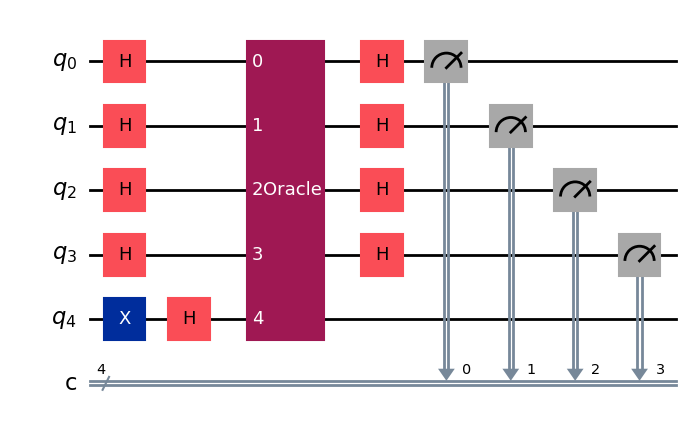

In [8]:
n=4
oracle_gate=dj_oracle('balanced', n)
dj_circuit=dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

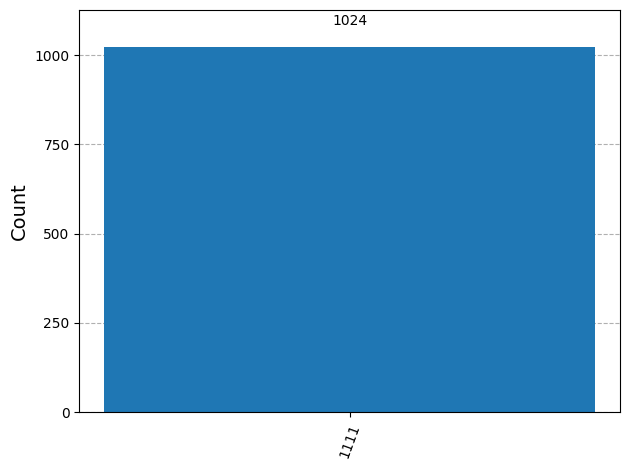

In [11]:
transpiled_dj_circuit=transpile(dj_circuit,aer_sim)
results=aer_sim.run(transpiled_dj_circuit).result()
answer=results.get_counts()
plot_histogram(answer)